## **Setup**

In [1]:
from fastai.vision.all import *

In [2]:
import os
import shutil
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
from zipfile import ZipFile
from tempfile import TemporaryDirectory
from PIL import Image

from sklearn.metrics import f1_score, accuracy_score

# plot options
# plt.rcParams.update({'font.size': 11})
plt.style.use('fivethirtyeight')

# **Functions**



In [3]:
def display_mask(imgnum):
    img=Image.open('/content/All_Data/Labels/train_gt/image_'+imgnum+'.png')
    img=np.asarray(img)*255
    display(Image.fromarray(np.uint8(img)))

# Unzip


In [4]:
home_dir='/storage/BPI/Data/LNDST/'

In [5]:
# All_Data is the home directory for the images, from which training and validation splits will be taken
if not os.path.exists(f'{home_dir}All_Data/'):
    os.mkdir(f'{home_dir}All_Data/')
    
    with ZipFile(f'{home_dir}test_images.zip', 'r') as zip_ref:
        zip_ref.extractall(f'{home_dir}All_Data/Images/')
  # with ZipFile(f'{mount_path}/{competition_path}/train_gt.zip', 'r') as zip_ref:
  #   zip_ref.extractall('/content/All_Data/Labels/')
    

In [6]:
# imgnum=str(np.random.randint(1399))
# display_mask(imgnum)
# display(Image.open('/content/All_Data/Images/train_images/image_'+imgnum+'.jpg'))

In [7]:
testdir=f'{home_dir}All_Data/Images/test_images/'

In [8]:
def get_msk(itmpath):
    return os.path.join(traindir,f'Labels/train_gt/{itmpath.stem}.png')
  
# test
# get_msk(Path('/content/All_Data/Images/train_images/image_10.jpg'))

Train the Model Zoo

In [9]:
import gc

In [10]:
# model_files=glob.glob(f'{home_dir}Models/*.pkl')
# print(model_files)

model_files=['/storage/BPI/Data/LNDST/Models/200901_0710_resnet18_cv0.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0723_resnet18_cv1.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0736_resnet18_cv2.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0749_xresnet18_cv0.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0803_xresnet18_cv1.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0816_xresnet18_cv2.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0830_resnet34_cv0.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0844_resnet34_cv1.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0857_resnet34_cv2.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0911_xresnet34_cv0.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0925_xresnet34_cv1.pkl',
             '/storage/BPI/Data/LNDST/Models/200901_0939_xresnet34_cv2.pkl']

In [11]:
model_files[6]

'/storage/BPI/Data/LNDST/Models/200901_0830_resnet34_cv0.pkl'

In [12]:
imglst=[f'/storage/BPI/Data/LNDST/All_Data/Images/test_images/image_{ii}.jpg' for ii in range(len(get_image_files(testdir)))]

In [13]:
for model in model_files:
    learn = load_learner(model)

    model_name=os.path.basename(model[:-4])
    print(model_name)

    tst_dl=learn.dls.test_dl(imglst)

    learn.epoch=0
    preds = learn.tta(dl=tst_dl,n=5)[0]
    # preds = learn.tta(dl=tst_dl,n=2)[0]

    np.save(f'/storage/BPI/Data/LNDST/{model_name}_test.npy', preds.numpy())

#     del learn, preds
#     gc.collect()
#     torch.cuda.empty_cache()
#     gc.collect()

200901_0710_resnet18_cv0


200901_0723_resnet18_cv1


200901_0736_resnet18_cv2


200901_0749_xresnet18_cv0


200901_0803_xresnet18_cv1


200901_0816_xresnet18_cv2


200901_0830_resnet34_cv0


200901_0844_resnet34_cv1


200901_0857_resnet34_cv2


200901_0911_xresnet34_cv0


200901_0925_xresnet34_cv1


200901_0939_xresnet34_cv2


In [31]:
predsnp=preds.numpy()

In [33]:
def display_mask(img):
    display(Image.fromarray(np.uint8(img*255)))

In [34]:
binpredsnp=np.argmax(predsnp,1)

In [35]:
binpredsnp.shape

(467, 400, 400)

/storage/BPI/Data/LNDST/All_Data/Images/test_images/image_7.jpg


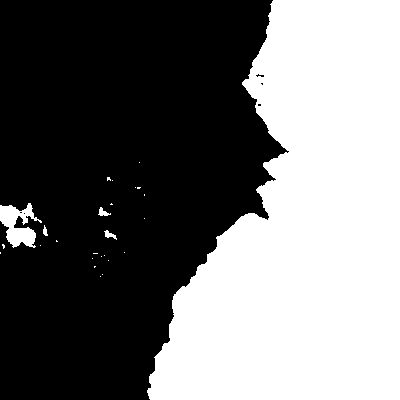

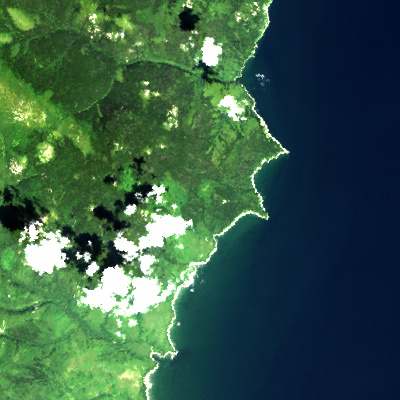

In [36]:
ind=7
print(imglst[ind])

# display_mask(np.argmax(preds[ind],0))
display_mask(binpredsnp[ind])
# Image.open(np.array(imglst)[sort_inds][ind])
Image.open(imglst[ind])